In [1]:
import os
import glob
import datetime
import numpy as np
import pandas as pd
import xarray as xr


import xesmf as xe

import matplotlib as mpl
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
from cartopy.mpl.ticker import LongitudeFormatter,LatitudeFormatter
import matplotlib.ticker as mticker

import rioxarray as rxr

In [5]:
ds0 = xr.open_dataset('/portal1/dell/li-b/NDVI/evi_m_qc.nc')
# ds0 = ds0.rename_vars({'SM':'vari'})
# ds0 = ds00.sel(time=slice('2020-01-01','2022-12-31'))

# newlon = np.linspace(110.5,122.025,1099)
# newlat = np.linspace(34,24.5,1058)
newlat = np.linspace(34, 24.5, 1141) ## care about the order of lat and lon
newlon = np.linspace(110.5, 122, 1381)


varis = ds0['vari'].values
ds = xr.Dataset({'vari': (['time','lat','lon'], varis)},
                      coords={ 'time': (['time'], ds0.time.values),
                              'lat': (['lat'], newlat),
                      'lon': (['lon'], newlon)})
arr = ds['vari']

## bound of krig is: (110.575,122.025)(33.975,24.525)
krig = rxr.open_rasterio('/portal1/dell/li-b/LC_IGBP_2022_epsg4326.tif')
ds_out = xr.Dataset(
    {
        "lat": (["lat"], krig.y.values, {"units": "degrees_north"}),
        "lon": (["lon"], krig.x.values, {"units": "degrees_east"}),
    }
)

regridder = xe.Regridder(ds, ds_out, 'bilinear')
# regridder  # print basic regridder information.

arr_out = regridder(arr, keep_attrs=True)
dd = arr_out.to_dataset(name='vari')

# dd.to_netcdf('/portal1/dell/li-b/NDVI/ndvi_m_qc_0.05.nc')

In [9]:
dd.to_netcdf('/portal1/dell/li-b/NDVI/evi_m_qc_0.05.nc')

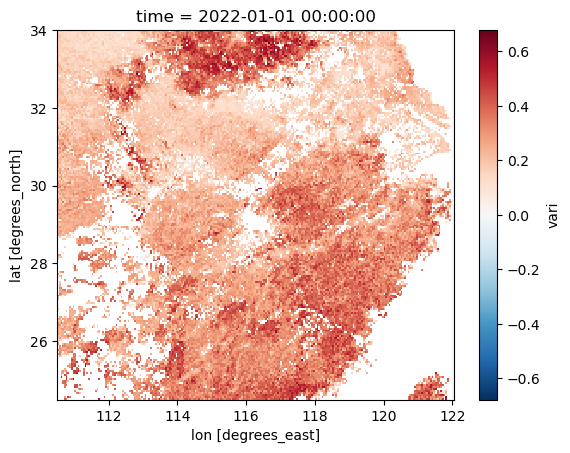

In [6]:
dd['vari'].sel(time = '2022-01-01').plot()

In [6]:
ds = xr.open_dataset('/portal1/dell/li-b/meteo/CHM_PRE_0.1dg_19612022.nc')
ds1 = ds['pre'].sel(longitude=ds.longitude.values, latitude=ds.latitude.values, time=ds.time.values).to_dataset(name='vari')
ds2 = ds1['vari'].sel(latitude=slice(24.45,34.05),longitude=slice(110.4,122.05),time=ds1.time.values).to_dataset(name='vari')
ds0 = ds2['vari'].where(ds2['vari']!=-99.9, np.nan).to_dataset(name='vari')
ds0

<xarray.Dataset>
Dimensions:    (longitude: 117, latitude: 97, time: 22645)
Coordinates:
  * longitude  (longitude) float64 110.4 110.5 110.6 110.7 ... 121.8 121.9 122.0
  * latitude   (latitude) float64 24.45 24.55 24.65 24.75 ... 33.85 33.95 34.05
  * time       (time) datetime64[ns] 1961-01-01 1961-01-02 ... 2022-12-31
Data variables:
    vari       (time, latitude, longitude) float32 0.0 0.0 0.0 ... nan nan nan

In [4]:
krig = rxr.open_rasterio('/portal1/dell/li-b/LC_IGBP_2022_epsg4326.tif')
krig

<xarray.DataArray (band: 1, y: 190, x: 231)>
[43890 values with dtype=uint8]
Coordinates:
  * band         (band) int64 1
  * x            (x) float64 110.5 110.6 110.6 110.7 ... 121.9 121.9 122.0 122.0
  * y            (y) float64 33.98 33.93 33.88 33.83 ... 24.68 24.63 24.58 24.53
    spatial_ref  int64 0
Attributes:
    AREA_OR_POINT:  Area
    scale_factor:   1.0
    add_offset:     0.0
    long_name:      Majority_Land_Cover_Type_1

In [2]:
ds0 = xr.open_dataset('/portal1/dell/li-b/NDVI/evi_m_qc.nc')
ds0

<xarray.Dataset>
Dimensions:  (time: 246, lat: 1141, lon: 1381)
Coordinates:
  * time     (time) object 2002-07-01 00:00:00 ... 2022-12-01 00:00:00
  * lat      (lat) float64 34.0 34.0 33.99 33.98 ... 24.53 24.52 24.51 24.5
  * lon      (lon) float64 110.5 110.5 110.5 110.5 ... 122.0 122.0 122.0 122.0
Data variables:
    vari     (time, lat, lon) float64 ...